# Exercises



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix,ConfusionMatrixDisplay
from acquire import get_titanic_data
from prepare import prep_titanic
%matplotlib inline
%config InlineBackend.figure_format = 'retina'




Using the titanic data, in your classification-exercises repository, create a notebook, `model.ipynb` where you will do the following:



In [9]:
titanic_df = get_titanic_data()
train,validate,test = prep_titanic(titanic_df)
train.head()
train.info()

KeyError: "None of [Int64Index([0, 1, 1, 1, 0, 0, 0, 0, 1, 1,\n            ...\n            0, 0, 0, 0, 0, 0, 1, 0, 1, 0],\n           dtype='int64', length=891)] are in the [columns]"

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.



In [5]:
#baseline prediction
x = ['fare','sex_male','sex_female','pclass','age']
y = 'sex_female' #so chosen because I need to do something different to enjoy this
# Baseline accuracy: accuracy
x_train = train[x]
y_train = train[y]

NameError: name 'train' is not defined

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)



In [4]:
tree = DecisionTreeClassifier(max_depth=7)
tree.fit(x_train,y_train)
plt.figure(figsize=(12,7))
predicted = tree.predict(train[x])
plot_tree(tree,feature_names=x_train.columns,class_names=['male','female'])

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.



array([[299,  24],
       [ 41, 134]])

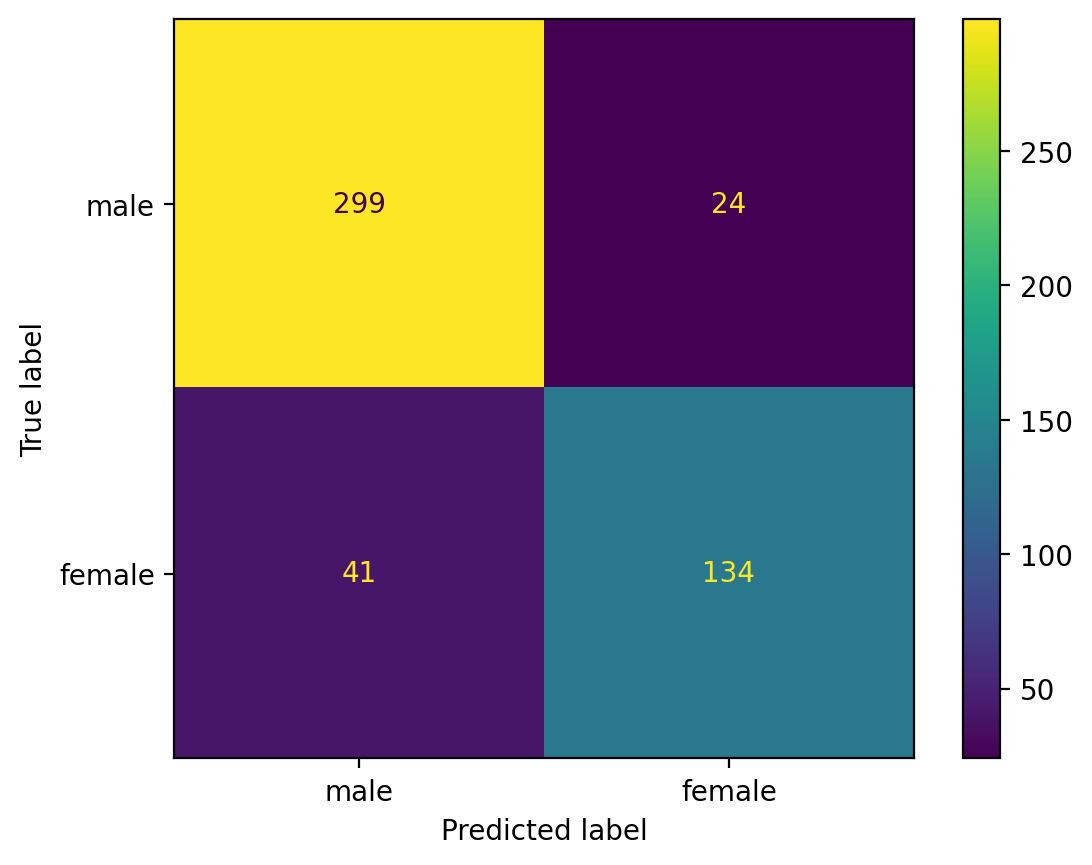

In [ ]:

confusion_disp = ConfusionMatrixDisplay.from_predictions(y_train,predicted,display_labels=['male','female'])
confusion = confusion_disp.confusion_matrix
confusion

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train,predicted)
print(classification_report(y_train,predicted))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       323
           1       0.85      0.77      0.80       175

    accuracy                           0.87       498
   macro avg       0.86      0.85      0.85       498
weighted avg       0.87      0.87      0.87       498



5. Run through steps 2-4 using a different max_depth value.



[Text(0.5, 0.8333333333333334, 'survived <= 0.5\ngini = 0.456\nsamples = 498\nvalue = [323, 175]\nclass = male'),
 Text(0.25, 0.5, 'pclass <= 2.5\ngini = 0.236\nsamples = 307\nvalue = [265, 42]\nclass = male'),
 Text(0.125, 0.16666666666666666, 'gini = 0.075\nsamples = 102\nvalue = [98, 4]\nclass = male'),
 Text(0.375, 0.16666666666666666, 'gini = 0.302\nsamples = 205\nvalue = [167, 38]\nclass = male'),
 Text(0.75, 0.5, 'fare <= 64.979\ngini = 0.423\nsamples = 191\nvalue = [58, 133]\nclass = female'),
 Text(0.625, 0.16666666666666666, 'gini = 0.453\nsamples = 153\nvalue = [53, 100]\nclass = female'),
 Text(0.875, 0.16666666666666666, 'gini = 0.229\nsamples = 38\nvalue = [5, 33]\nclass = female')]

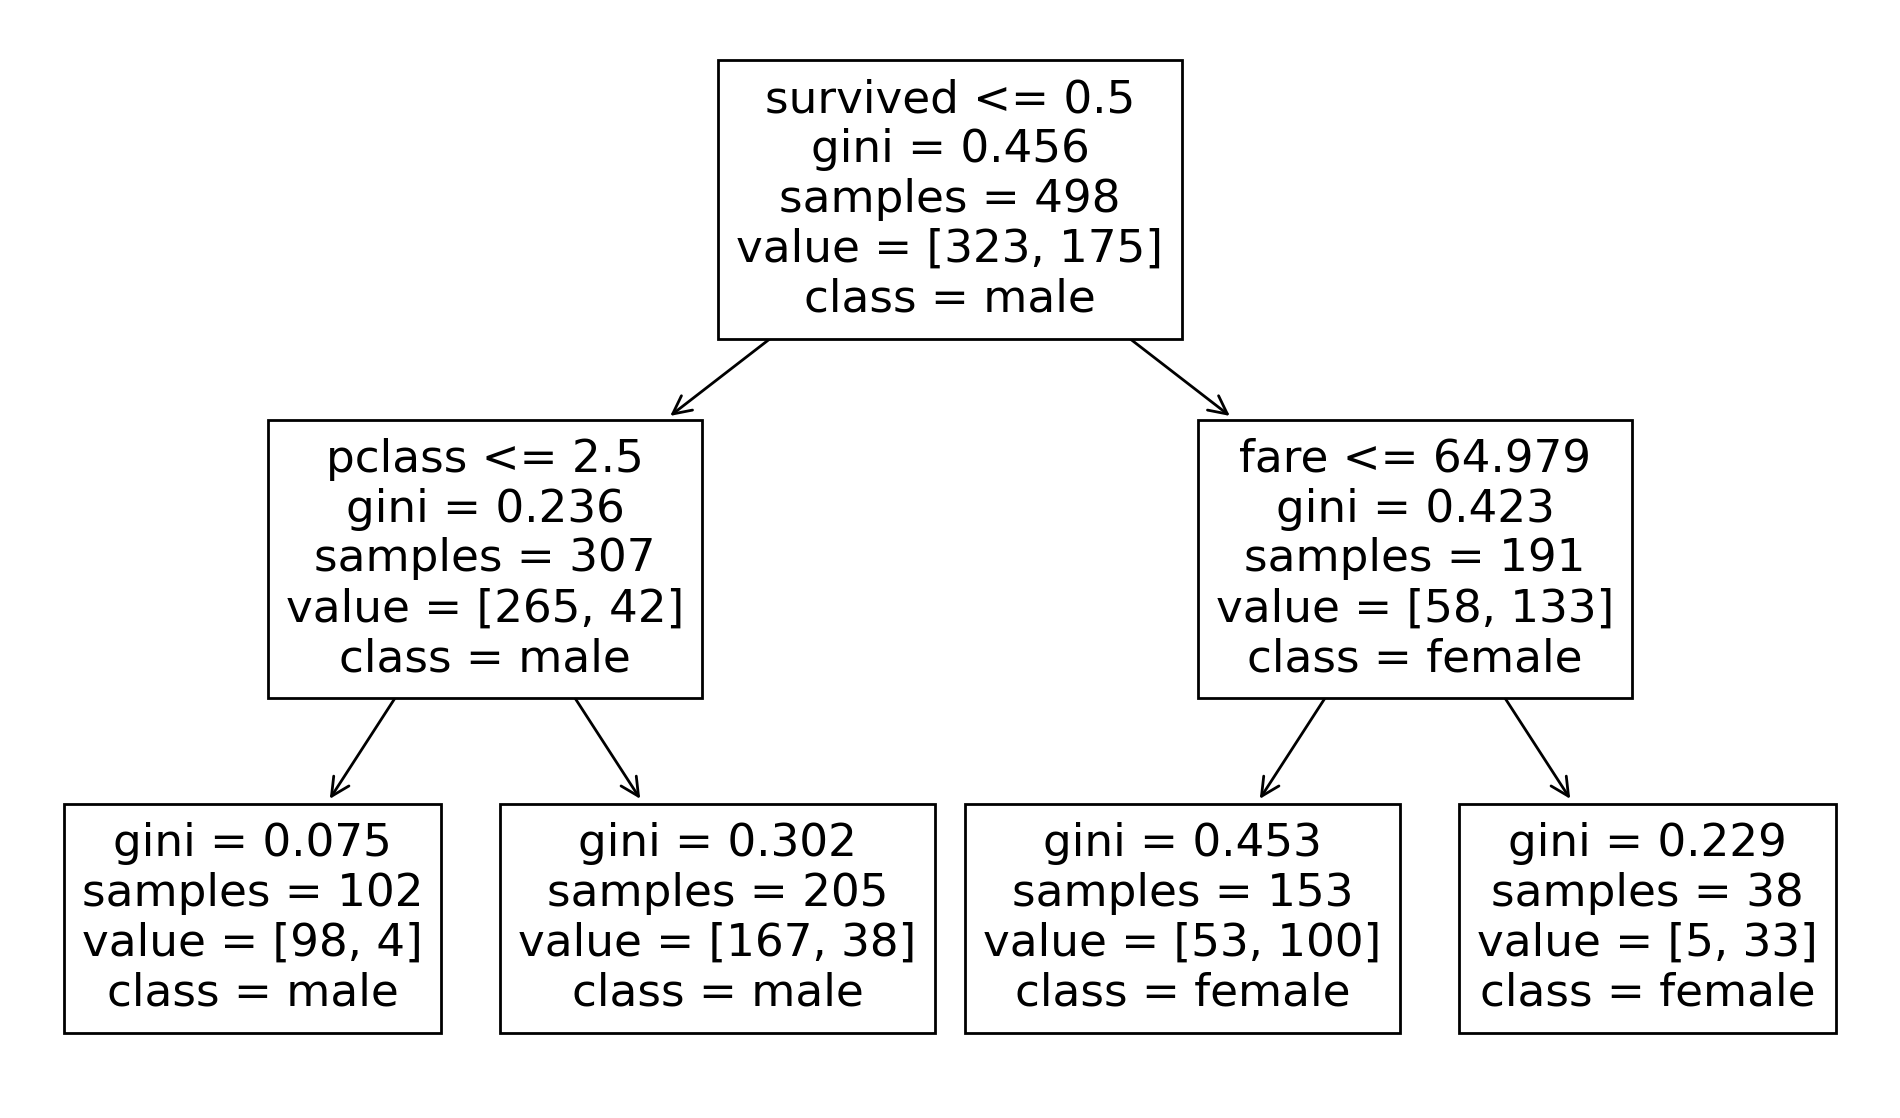

In [ ]:
tree_2 = DecisionTreeClassifier(max_depth=2)
tree_2.fit(x_train,y_train)
plt.figure(figsize=(12,7))
predicted = tree_2.predict(train[x])
plot_tree(tree_2,feature_names=x_train.columns,class_names=['male','female'])

array([[265,  58],
       [ 42, 133]])

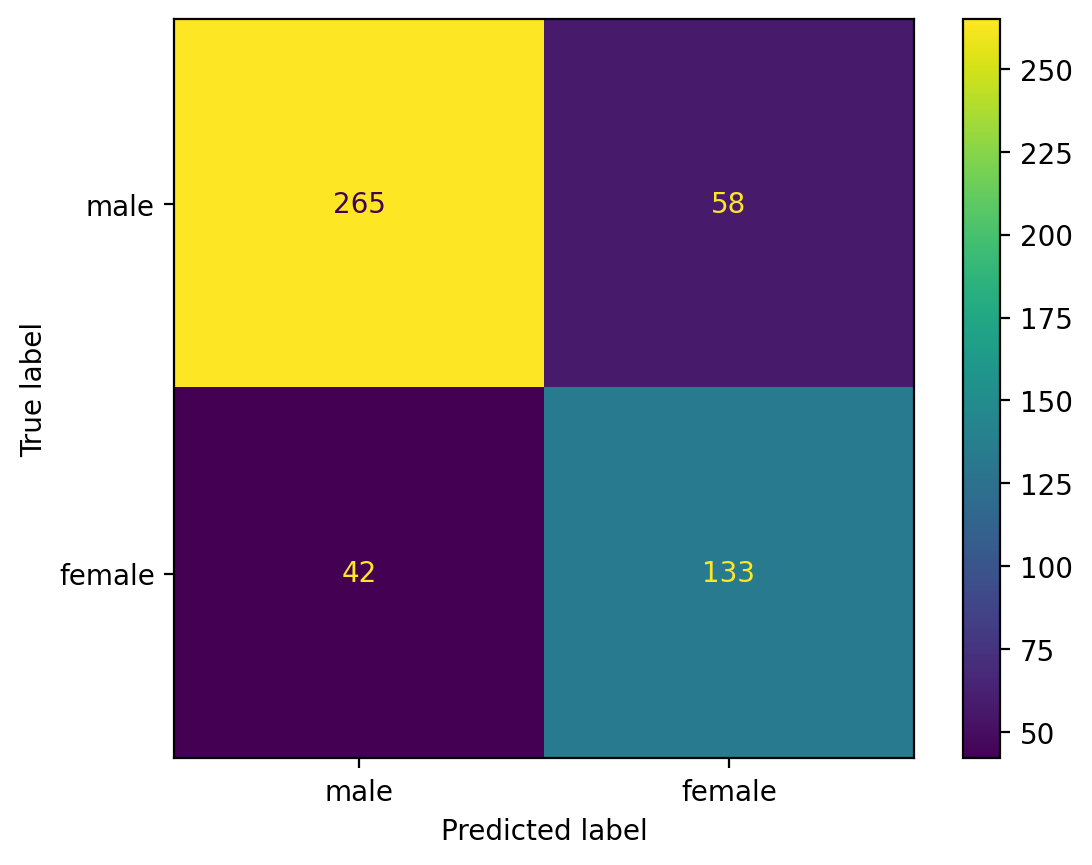

In [ ]:

confusion_disp = ConfusionMatrixDisplay.from_predictions(y_train,predicted,display_labels=['male','female'])
confusion = confusion_disp.confusion_matrix
confusion

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train,predicted)
print(classification_report(y_train,predicted))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       323
           1       0.70      0.76      0.73       175

    accuracy                           0.80       498
   macro avg       0.78      0.79      0.78       498
weighted avg       0.80      0.80      0.80       498



6. Which model performs better on your in-sample data?

The first model (with greater depth) performs better...by one prediction

7. Which model performs best on your out-of-sample data, the validate set?



In [ ]:
x_validate = validate[x]
y_validate = validate[y]


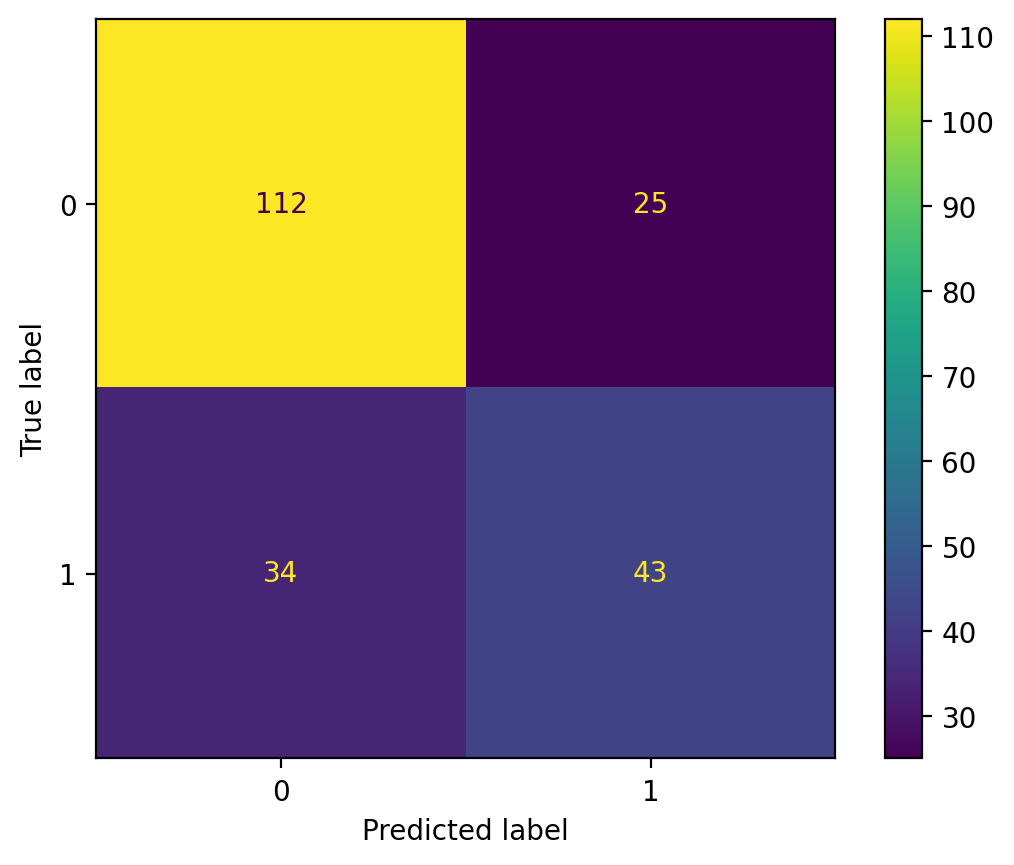

In [ ]:
validate_predict = tree.predict(x_validate)
validate_confusion = ConfusionMatrixDisplay.from_predictions(y_validate,validate_predict)

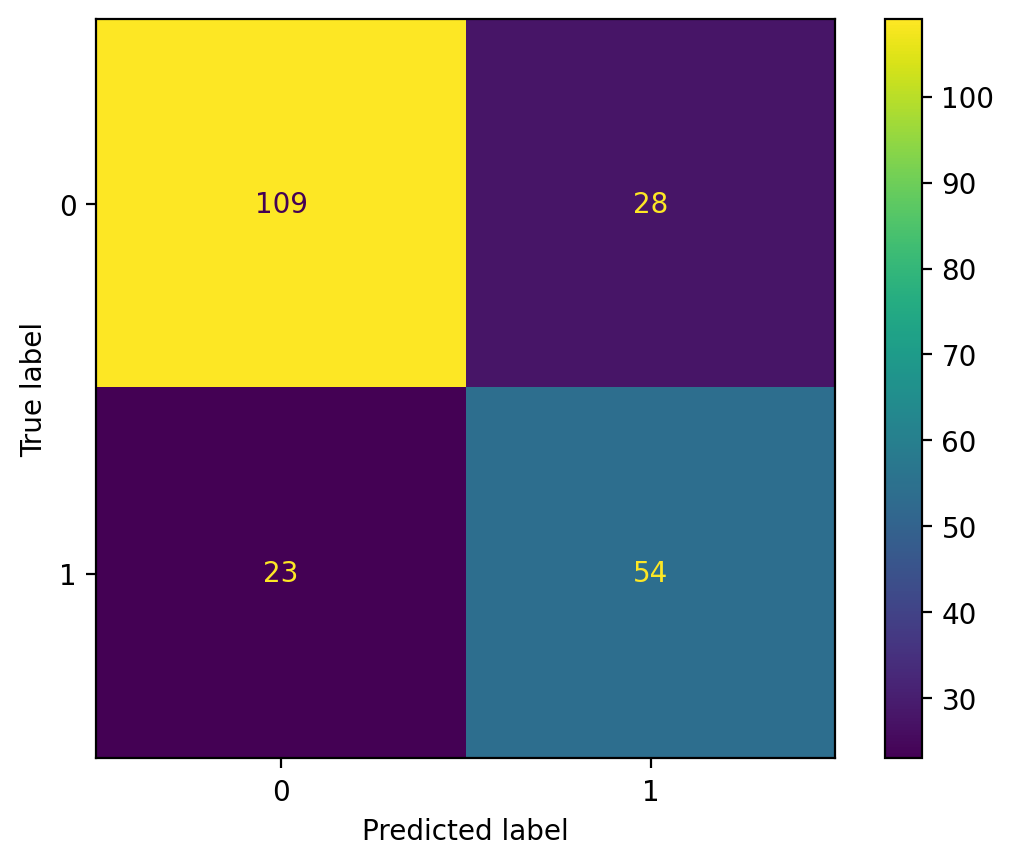

In [ ]:
validate_2 = tree_2.predict(x_validate)
ConfusionMatrixDisplay.from_predictions(y_validate,validate_2)

8. Work through these same exercises using the Telco dataset.


# Random Forest
## Exercises

Continue working in your `model` file with titanic data to do the following: 

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

<BarContainer object of 3 artists>

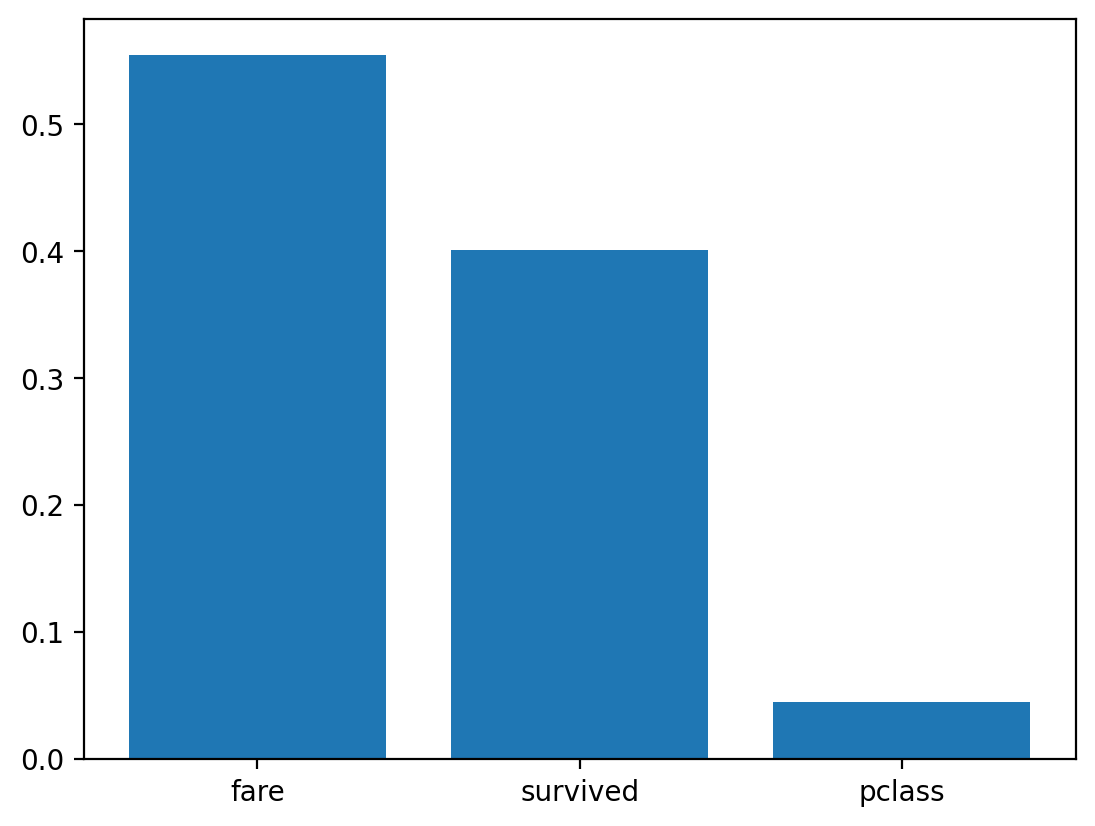

In [ ]:
rf1 = RandomForestClassifier(min_samples_leaf=1,max_depth=10,random_state=69)
rf1.fit(x_train,y_train)
plt.bar(x_train.columns,rf1.feature_importances_)

2. Evaluate your results using the model score, confusion matrix, and classification report.



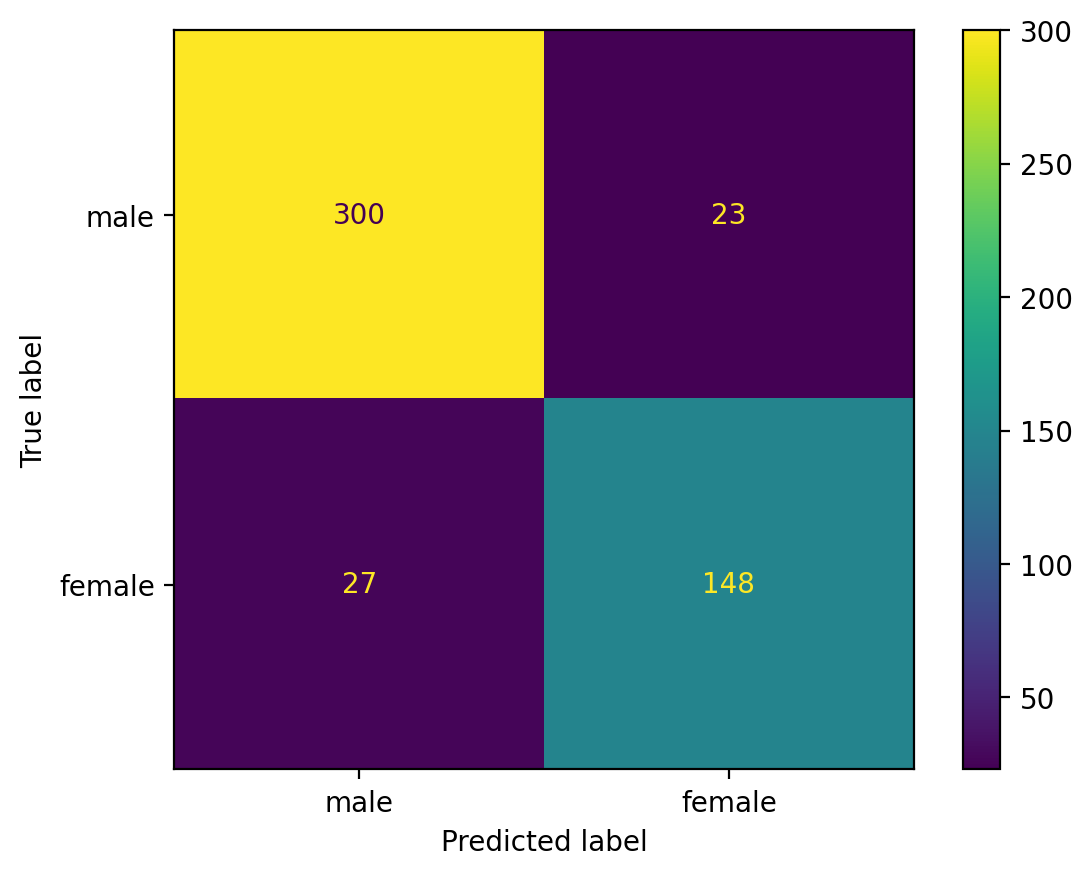

In [ ]:
predictions = rf1.predict(x_train)
ConfusionMatrixDisplay.from_predictions(y_train,predictions,display_labels=['male','female'])

1. Print and clearly label the following:  Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

1. Run through steps increasing your min_samples_leaf and decreasing your max_depth. 

1. What are the differences in the evaluation metrics?  Which performs better on your in-sample data?  Why?

After making a few models, which one has the best performance (or closest metrics) on both train and validate?